In [1]:
import numpy as np
from csc.utils import *
from csc.atoms import *
from csc.workbench import *
from csc.dictionary import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.06
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.010
ymax = 0.036
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 143 different atoms


### Workbench initialization with a database path

In [2]:
batchSize = 200
path_to_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-signals-{batchSize}.json'
path_to_mmpdf_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mmpdf-{batchSize}.json'

workbench = CSCWorkbench(path_to_signals_db)
workbench.load_data()
workbench.set_dictionary(dictionary)

In [61]:
metrics_at_step1 = workbench.sortByOMPMSE(path_to_mmpdf_db, ascending=False)
print(Counter([snr for snr in metrics_at_step1['snr']]))

Counter({-5: 1000, 0: 1000, 5: 1000, 10: 1000, 15: 1000})


## Top 10 of signals where OMP fails

In [62]:
metrics_at_step1 = metrics_at_step1.loc[metrics_at_step1['sparsity'] == 4]
metrics_at_step1 = metrics_at_step1.loc[metrics_at_step1['snr'] == 10]
print(metrics_at_step1.head(10))
ids = [id for id in metrics_at_step1.head(10)['id']]
print(ids)

        id  snr  sparsity   omp-mse   mmp-mse
3290  3290   10         4  0.002263  0.002241
3255  3255   10         4  0.002230  0.002230
3225  3225   10         4  0.002176  0.002143
3280  3280   10         4  0.001827  0.001792
3324  3324   10         4  0.001804  0.001804
3320  3320   10         4  0.001706  0.001442
3317  3317   10         4  0.001700  0.001664
3350  3350   10         4  0.001665  0.001325
3353  3353   10         4  0.001661  0.001661
3326  3326   10         4  0.001658  0.001630
[3290, 3255, 3225, 3280, 3324, 3320, 3317, 3350, 3353, 3326]


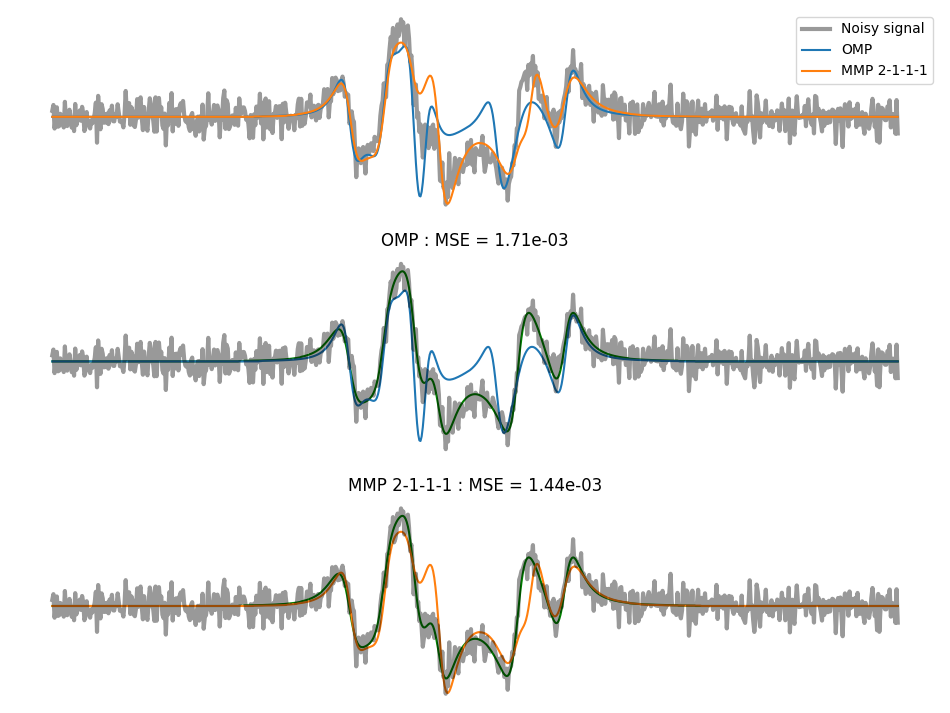

In [63]:
workbench.plotMMPComparison(mmpdf_db_path=path_to_mmpdf_db, id=ids[5])